In [1]:
#project:
#mat format to datafram
#data preprocessing(image processing)
#balance dataset
#data augmentation(image generator)
#3 diferent clustering technique(drop the y) in 3th step: (week11)

#cluster_id= y'(target)
#cnn
#don't use the original y to recognise the faces or images
# build front end


#week 6: SOM: used for fraud detection. verry weel
#gridshape 3 by 3: n--n--n
#                  n--n--n
#                  n--n--n
# distance matrix we can consider it as reduced dataset


In [1]:
# #Data:

# 1. Split the training set, a validation set, and a test set using stratified sampling to 
# ensure that there are the same number of images per person in each set. 
# Provide your rationale for the split ratio [5 points]
    
# 2. In the analysis report, discuss the rationale behind how your team preprocess the data. 
# Include the mathematical equations used and any dimensionality reduction applied #use spectral, pca, t-sne
# to the instanced and discuss its relevance to the problem at hand. 
# Note that your team will receive more points if you perform data preprocessing 
# that help improve the eventual training process. [20 points]

# 3. Select a clustering technique taught in this course and apply it on the training instances. 
# Provide the rationale behind your team’s choice of clustering technique 
# and how your team tuned the parameters for the technique implemented. [30 points]

# 4. In the analysis report, clearly discuss - with illustrations - the architecture 
# your team has selected for training and predicting the test instances. 
# Discuss the rationale behind your team’s choice of activation functions, loss function, 
# and how you tuned the hyperparameters of the network model. [30 points]

# 5. Discuss the results of the trained system in the report. [5 points]

# 6. Demonstrate the project as a Team. In the analysis report, discuss the decisions 
# your team made, the challenges your team encountered, how your team resolved the problems, 
# and the results. [10 points]

# https://www.kaggle.com/code/valentynsichkar/convolutional-neural-network-from-scratch-mnist


In [2]:
# Import the necessary libraries
import scipy.io
import pandas as pd

In [3]:
# Load the umist_cropped.mat file using scipy.io
mat = scipy.io.loadmat('umist_cropped.mat')

# Display the keys of the loaded .mat file to understand its structure
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'facedat', 'dirnames'])

In [4]:
mat['facedat']

array([[array([[[233, 234, 234, ..., 236, 230, 234],
                [234, 234, 234, ..., 235, 234, 232],
                [234, 234, 234, ..., 236, 233, 234],
                ...,
                [234, 234, 234, ..., 237, 232, 233],
                [234, 234, 234, ..., 236, 233, 234],
                [234, 234, 233, ..., 236, 234, 233]],

               [[234, 234, 234, ..., 236, 232, 233],
                [234, 234, 234, ..., 234, 233, 234],
                [234, 234, 234, ..., 235, 233, 233],
                ...,
                [234, 234, 234, ..., 236, 230, 234],
                [234, 234, 234, ..., 236, 234, 233],
                [234, 234, 234, ..., 237, 233, 230]],

               [[234, 233, 234, ..., 236, 232, 233],
                [234, 234, 233, ..., 235, 230, 234],
                [234, 234, 234, ..., 237, 233, 233],
                ...,
                [234, 234, 234, ..., 237, 232, 233],
                [234, 233, 234, ..., 239, 232, 233],
                [234, 232, 234, 

In [5]:
face_data = mat['facedat'][0]  
len(face_data)

20

In [6]:
mat['dirnames']
face_data = mat['facedat'][0]  
print(f'\nfacedat type: {type(mat["facedat"])}, facedat shape: {mat["facedat"].shape}')
print(f'dirnames type: {type(mat["dirnames"])}, dirnames shape: {mat["dirnames"].shape}')
print(f'\nNumber of people in images [len(face_data)]: {len(face_data)}\nImage height [len(face_data[0]]: {len(face_data[0])}\nImage width [len(face_data[0][0]]: {len(face_data[0][0])}\nImage total pixels [height X width]: {len(face_data[0]) * len(face_data[0][0])}')



facedat type: <class 'numpy.ndarray'>, facedat shape: (1, 20)
dirnames type: <class 'numpy.ndarray'>, dirnames shape: (1, 20)

Number of people in images [len(face_data)]: 20
Image height [len(face_data[0]]: 112
Image width [len(face_data[0][0]]: 92
Image total pixels [height X width]: 10304


In [7]:
import scipy.io
import pandas as pd
import numpy as np

# Load the .mat file
mat = scipy.io.loadmat('umist_cropped.mat')

# Extract the facedat and dirnames
facedat = mat['facedat']
dirnames = mat['dirnames']

# Prepare a list to store flattened images and corresponding labels
image_list = []
labels = []

# Iterate over each entry in facedat and corresponding label in dirnames
for i in range(facedat.shape[1]):  # facedat[0, i] gives each set of images for a person
    image_set = facedat[0, i]      # Extract the 3D array of images for this person
    num_images = image_set.shape[-1]  # Get the number of images in this set

    for j in range(num_images):       # Loop over each image for the person
        image = image_set[:, :, j]    # Select individual 2D image
        image_flat = image.flatten()  # Flatten the image

        # Append flattened image to the list
        image_list.append(image_flat)

        # Extract label (e.g., '1a', '1b', ...) as a string and assign to each image
        labels.append(dirnames[0, i][0])

# Create a DataFrame with flattened images
data_group2 = pd.DataFrame(image_list)

# Add labels as a new column in the DataFrame
data_group2['label'] = labels

# Display the first few rows to verify the DataFrame structure
print(data_group2.head())


     0    1    2    3    4    5    6    7    8    9  ...  10295  10296  10297  \
0  233  234  234  233  234  232  232  168   99   78  ...    154    151    147   
1  234  234  234  234  233  232  202   98   79   77  ...    154    150    147   
2  234  234  234  234  233  230  225  109   85   84  ...    174    168    164   
3  234  234  234  234  234  234  234  232  229  205  ...    168    162    157   
4  234  234  234  234  234  234  234  234  229  211  ...    176    170    164   

   10298  10299  10300  10301  10302  10303  label  
0    143    140    141    141    140    136     1a  
1    141    140    137    138    137    137     1a  
2    157    152    151    148    145    145     1a  
3    155    150    144    144    142    143     1a  
4    162    157    152    150    148    148     1a  

[5 rows x 10305 columns]


In [8]:
data_group2.shape

(575, 10305)

In [ ]:
#check missing values in the dataset
print('missing values', data_group2.isnull().sum())

#check the data types of the columns
print('data types', data_group2.dtypes)
#check the shape of the dataset
print('shape', data_group2.shape)
#check the unique values in the label column
print('unique values', data_group2['label'].unique())
#check the distribution of the label column
print('distribution', data_group2['label'].value_counts())
#check the minimum and maximum values in the dataset
print('min', data_group2.min())
print('max', data_group2.max())

#min max of all the columns except the label column
print('min', data_group2.iloc[:, :-1].min().min())
print('max', data_group2.iloc[:, :-1].max().max())




missing values 0        0
1        0
2        0
3        0
4        0
        ..
10300    0
10301    0
10302    0
10303    0
label    0
Length: 10305, dtype: int64
data types 0         uint8
1         uint8
2         uint8
3         uint8
4         uint8
          ...  
10300     uint8
10301     uint8
10302     uint8
10303     uint8
label    object
Length: 10305, dtype: object
shape (575, 10305)
unique values ['1a' '1b' '1c' '1d' '1e' '1f' '1g' '1h' '1i' '1j' '1k' '1l' '1m' '1n'
 '1o' '1p' '1q' '1r' '1s' '1t']
distribution label
1s    48
1a    38
1b    35
1l    34
1k    34
1t    34
1r    33
1j    32
1n    30
1e    26
1m    26
1p    26
1q    26
1c    26
1d    24
1f    23
1h    22
1i    20
1g    19
1o    19
Name: count, dtype: int64
min 0         1
1         1
2         1
3         1
4         1
         ..
10300    19
10301    20
10302    20
10303    20
label    1a
Length: 10305, dtype: object
max 0        239
1        237
2        236
3        237
4        237
        ... 
10300    212

In [10]:
#label shape
print('label shape', data_group2['label'].shape)

label shape (575,)


In [11]:
#sepate the features and the target variable
data_group2_features = data_group2.iloc[:, :-1]
data_group2_target = data_group2.iloc[:, -1]

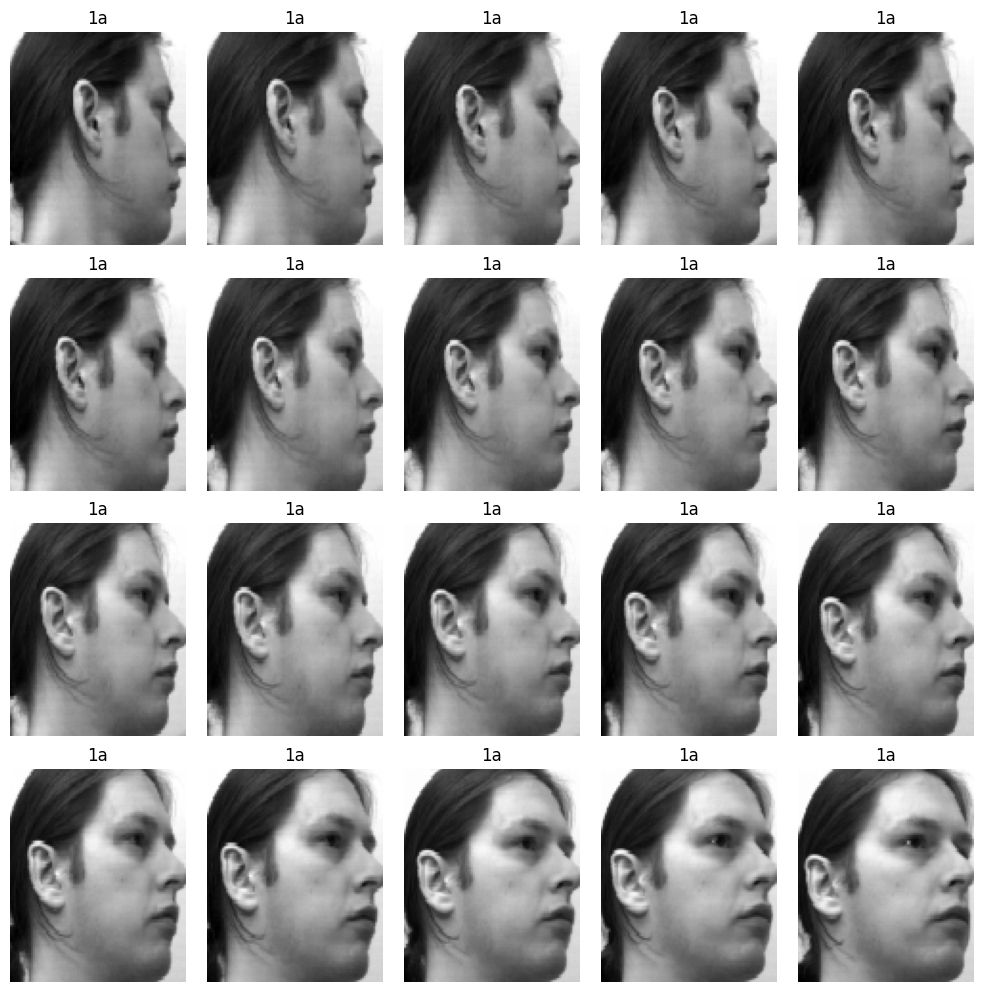

In [12]:
#plot the image of same person 
import matplotlib.pyplot as plt

# Display the first 10 images of same person
fig, axes = plt.subplots(4, 5, figsize=(10, 10))
axes = axes.ravel()

for i in range(20):
    axes[i].imshow(data_group2_features.iloc[i].values.reshape(112, 92), cmap='gray')
    axes[i].set_title(data_group2_target[i])
    axes[i].axis('off')

plt.tight_layout()
plt.show()



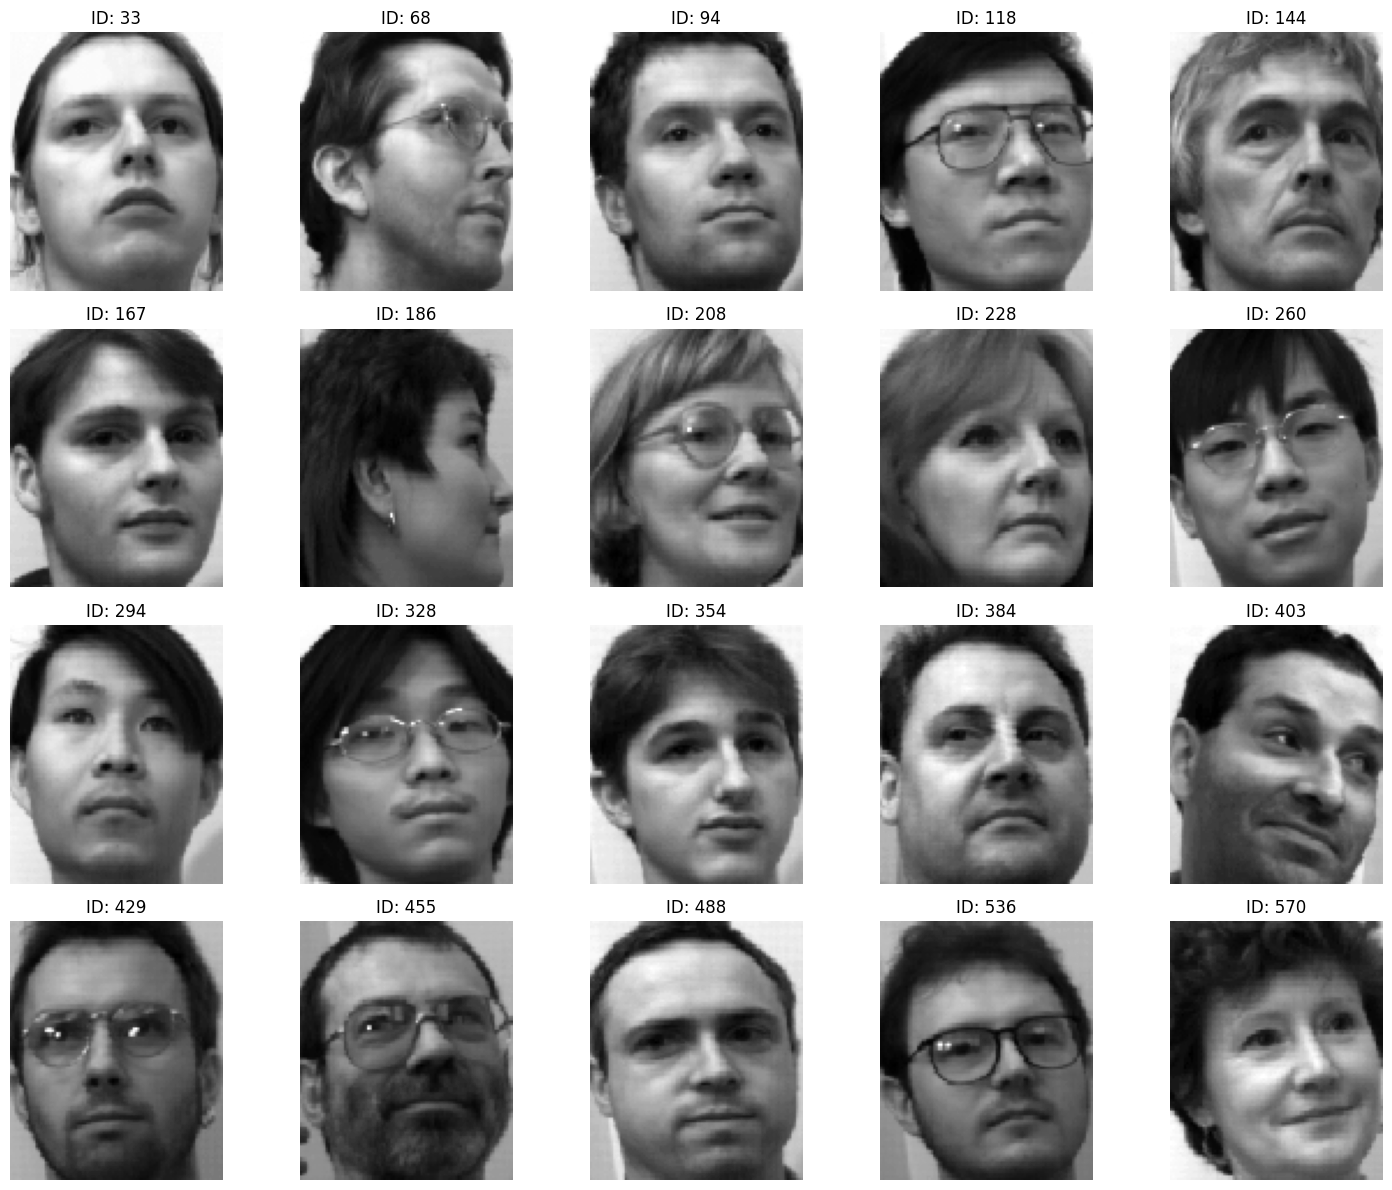

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data_group2' is your DataFrame and 'label' is the target column
data_group2_target = 'label'

# Group by the target column and select the before the last image for each unique person
distinct_people = data_group2.groupby(data_group2_target).nth(-5)
#distinct_people = data_group2.groupby(data_group2_target).last().head(20)  # Select up to 20 distinct people

# Exclude the 'label' column from image data if it's present
if 'label' in distinct_people.columns:
    distinct_people_images = distinct_people.drop('label', axis=1)
else:
    distinct_people_images = distinct_people.copy()

# Verify the shape to ensure it has 10,304 columns
assert distinct_people_images.shape[1] == 10304, f"Expected 10304 image columns, got {distinct_people_images.shape[1]}"

# Display the first 20 images of distinct people
fig, axes = plt.subplots(4, 5, figsize=(15, 12))  # Increased figsize for better visibility
axes = axes.ravel()

for i, (person, image) in enumerate(distinct_people_images.iterrows()):
    # Reshape the image data
    img = image.values.reshape(112, 92)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f"ID: {person}")  # Displaying the person ID
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [14]:
#https://www.kaggle.com/code/karanwl/ensemblefacerecog-fusion-of-k-means-and-neural-ne

In [15]:
# 2. Data Preprocessing
# 2.1. Normalize Pixel Values
# Normalize the pixel values to a range of [0, 1] to facilitate faster and more effective training.

import numpy as np

# Convert to numpy arrays
X = data_group2_features.values
y = data_group2_target

# Normalize pixel values to [0,1]
X = X / 255.0
print("Data normalization completed.")

Data normalization completed.


In [16]:
# 2.2. Handle Missing Values
# Check for and handle any missing values in the dataset.

# Check for missing values
if np.isnan(X).any():
    X = np.nan_to_num(X)  # Replace NaNs with zeros
    print("Missing values detected and handled.")
else:
    print("No missing values detected.")

No missing values detected.


In [17]:
# 3. Data Transformation
# 3.1. Reshape for Image Processing
# Reshape the flat feature vectors into their original image dimensions (112x92) with a single grayscale channel.

# Reshape for image processing (assuming images are 112x92 and grayscale)
X_images = X.reshape(-1, 112, 92, 1)
print(f"Reshaped data: {X_images.shape}")

Reshaped data: (575, 112, 92, 1)


In [18]:
# 3.2. Data Augmentation Setup
# Set up data augmentation using ImageDataGenerator to enhance the diversity of the training dataset.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation setup
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

# Note: ImageDataGenerator will be applied during training
print("Data augmentation setup completed.")

Data augmentation setup completed.


In [19]:
import scipy.io
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load the .mat file
mat = scipy.io.loadmat('umist_cropped.mat')

# Extract the facedat and dirnames
facedat = mat['facedat']
dirnames = mat['dirnames']

# Prepare lists to store the images and labels
image_list = []
labels = []

# Iterate over each entry in facedat and corresponding label in dirnames
for i in range(facedat.shape[1]):
    image_set = facedat[0, i]
    num_images = image_set.shape[-1]

    for j in range(num_images):
        image = image_set[:, :, j]
        image_flat = image.flatten()
        image_list.append(image_flat)
        labels.append(dirnames[0, i][0])

# Create a DataFrame with flattened images
data_group2 = pd.DataFrame(image_list)
data_group2['label'] = labels

# Determine the maximum count to balance the dataset
target_count = data_group2['label'].value_counts().max()
print("Target image count for each label:", target_count)

# Define data augmentation settings
datagen = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.1,
    horizontal_flip=True
)

# Balance the dataset by augmenting images
balanced_images = []
balanced_labels = []

# Iterate over each unique label to augment images where needed
for label in data_group2['label'].unique():
    label_images = data_group2[data_group2['label'] == label].drop(columns=['label']).values
    label_count = label_images.shape[0]
    print(f"Current count for label '{label}': {label_count}")

    # Reshape each flattened image back to original dimensions
    reshaped_images = [img.reshape(112, 92, 1) for img in label_images]  # Assuming 112x92 image size

    # Convert list to numpy array
    reshaped_images = np.array(reshaped_images)

    # Add original images to balanced dataset
    for img in reshaped_images:
        balanced_images.append(img.flatten())
        balanced_labels.append(label)

    # Generate augmented images if current count is less than target
    if label_count < target_count:
        n_needed = target_count - label_count
        i = 0
        for batch in datagen.flow(reshaped_images, batch_size=1):
            augmented_img = batch[0].reshape(112, 92)  # Reshape to 112x92 if needed
            balanced_images.append(augmented_img.flatten())
            balanced_labels.append(label)
            i += 1
            if i >= n_needed:
                break

# Create a new balanced DataFrame
balanced_data_group2 = pd.DataFrame(balanced_images)
balanced_data_group2['label'] = balanced_labels

# Verify the balancing
print(balanced_data_group2['label'].value_counts())




Target image count for each label: 48
Current count for label '1a': 38
Current count for label '1b': 35
Current count for label '1c': 26
Current count for label '1d': 24
Current count for label '1e': 26
Current count for label '1f': 23
Current count for label '1g': 19
Current count for label '1h': 22
Current count for label '1i': 20
Current count for label '1j': 32
Current count for label '1k': 34
Current count for label '1l': 34
Current count for label '1m': 26
Current count for label '1n': 30
Current count for label '1o': 19
Current count for label '1p': 26
Current count for label '1q': 26
Current count for label '1r': 33
Current count for label '1s': 48
Current count for label '1t': 34
label
1a    48
1b    48
1s    48
1r    48
1q    48
1p    48
1o    48
1n    48
1m    48
1l    48
1k    48
1j    48
1i    48
1h    48
1g    48
1f    48
1e    48
1d    48
1c    48
1t    48
Name: count, dtype: int64


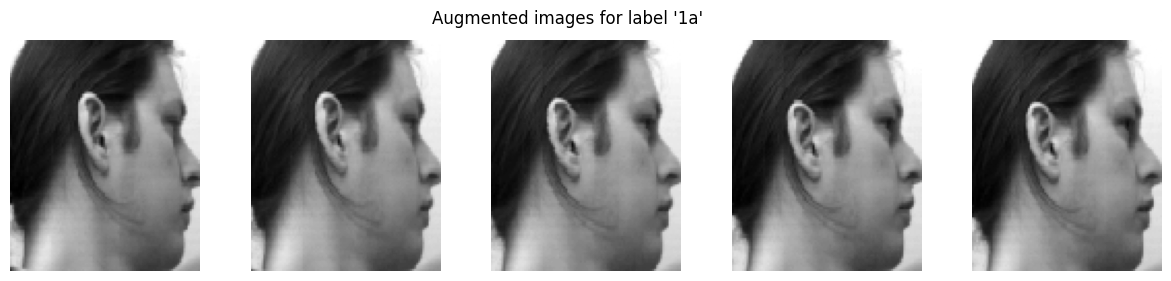

In [20]:
# Optional: Display some examples to verify augmentation
label_to_display = '1a'  # Replace with any label to visualize augmented images
fig, axs = plt.subplots(1, 5, figsize=(15, 3))
for i, augmented_image in enumerate(
        np.array(balanced_images)[np.array(balanced_labels) == label_to_display][:5]):
    axs[i].imshow(augmented_image.reshape(112, 92), cmap='gray')
    axs[i].axis('off')
plt.suptitle(f"Augmented images for label '{label_to_display}'")
plt.show()

In [21]:
#check the distribution of the label column
print('distribution', data_group2['label'].value_counts())

distribution label
1s    48
1a    38
1b    35
1l    34
1k    34
1t    34
1r    33
1j    32
1n    30
1e    26
1m    26
1p    26
1q    26
1c    26
1d    24
1f    23
1h    22
1i    20
1g    19
1o    19
Name: count, dtype: int64


In [22]:
# 4. Data Consistency
# 4.1. Check for Duplicate Entries
# Ensure there are no duplicate entries in the dataset that could bias the model.

import pandas as pd

# Combine features and target for duplicate detection
data_combined = data_group2.copy()

# Check for duplicate entries
duplicate_count = data_combined.duplicated().sum()
print(f"Number of duplicate entries: {duplicate_count}")

# Remove duplicates if any
if duplicate_count > 0:
    data_combined = data_combined.drop_duplicates()
    data_group2_features = data_combined.iloc[:, :-1].values / 255.0
    data_group2_target = data_combined.iloc[:, -1].values
    X_images = data_group2_features.reshape(-1, 112, 92, 1)
    print("Duplicate entries removed and data updated.")
else:
    print("No duplicate entries found.")

Number of duplicate entries: 10
Duplicate entries removed and data updated.


Class distribution before balancing: Counter({'l': 2, 'a': 1, 'b': 1, 'e': 1})


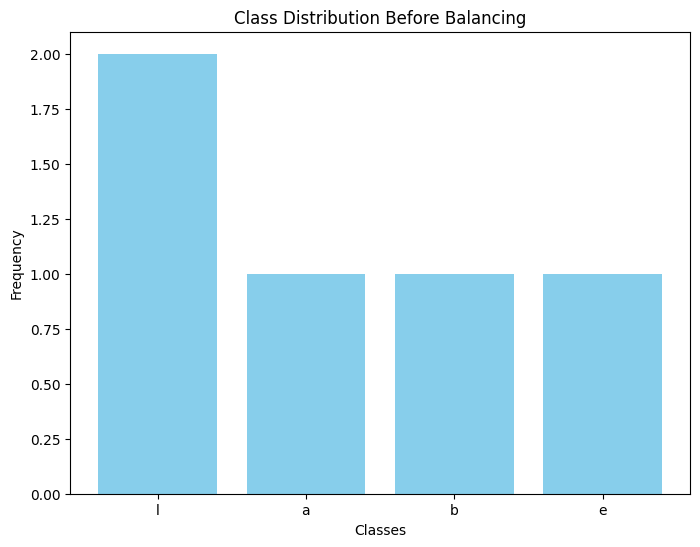

In [23]:
# 5. Imbalanced Dataset
# 5.1. Check Class Imbalance
# Examine the distribution of classes to identify any imbalance issues.

from collections import Counter
import matplotlib.pyplot as plt

# Analyze class distribution
counter = Counter(y)
print("Class distribution before balancing:", counter)

# Visualize class distribution
plt.figure(figsize=(8, 6))
plt.bar(counter.keys(), counter.values(), color='skyblue')
plt.title('Class Distribution Before Balancing')
plt.xlabel('Classes')
plt.ylabel('Frequency')
plt.show()

In [24]:
# 5.2. Addressing Class Imbalance with Data Augmentation
# Since the dataset is highly imbalanced (only one class present in the sample), applying data augmentation to generate more samples for diverse classes is essential. However, with the current dataset containing only one class, further data collection or synthesis would be necessary to expand the dataset meaningfully.

# Note: In a real-world scenario, you would use data augmentation techniques to increase the number of samples in minority classes. Here, with only one class present, data augmentation won't address class imbalance.



In [25]:
# 6. Splitting the Dataset
# 6.1. Stratified Sampling
# Split the dataset into training, validation, and testing sets using stratified sampling to maintain class distribution across all subsets.


from sklearn.model_selection import StratifiedShuffleSplit

# Initialize StratifiedShuffleSplit for the first split (train + temp) 60% train, 40% temp
s1 = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=44)
for train_index, temp_index in s1.split(data_group2_features, data_group2_target):
    X_train, X_temp = data_group2_features[train_index], data_group2_features[temp_index]
    y_train, y_temp = data_group2_target[train_index], data_group2_target[temp_index]

# Initialize StratifiedShuffleSplit for the second split (validation/test)
s2 = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=44)
for val_index, test_index in s2.split(X_temp, y_temp):
    X_val, X_test = X_temp[val_index], X_temp[test_index]
    y_val, y_test = y_temp[val_index], y_temp[test_index]

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (339, 10304) (339,)
Validation set shape: (113, 10304) (113,)
Test set shape: (113, 10304) (113,)


In [26]:
# 7. Principal Component Analysis (PCA)
# 7.1. Apply PCA to the Training Set
# Apply PCA to reduce dimensionality and capture the most significant variance in the training data.

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Apply PCA, retaining 99% of the variance
pca = PCA(n_components=0.99, svd_solver='full')
X_train_pca = pca.fit_transform(X_train_scaled)

print(f"Original number of features: {X_train.shape[1]}")
print(f"Reduced number of features after PCA: {X_train_pca.shape[1]}")



Original number of features: 10304
Reduced number of features after PCA: 223


In [27]:
# 7.2. Transform Validation and Test Sets Using PCA
# Transform the validation and test sets using the scaler and PCA fitted on the training data to avoid data leakage.

# Standardize using the same scaler
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Transform using the same PCA
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("PCA transformation on validation and test sets completed.")

PCA transformation on validation and test sets completed.


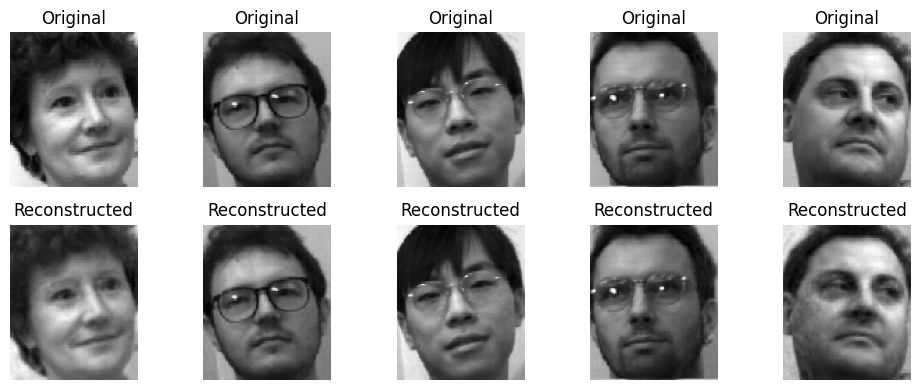

In [28]:
# 8. Visualization
# 8.1. Visualize Original vs. Reconstructed Images
# Since PCA was applied, we can visualize how well PCA captures the original images by reconstructing them from the reduced dimensions.

# Function to reconstruct images from PCA components
def reconstruct_image(pca, scaler, X_pca, image_shape=(112, 92)):
    X_reconstructed = pca.inverse_transform(X_pca)
    X_reconstructed = scaler.inverse_transform(X_reconstructed)
    return X_reconstructed.reshape(image_shape)

# Select a few samples to visualize
num_images = min(5, X_train.shape[0])
plt.figure(figsize=(10, 4))

for i in range(num_images):
    # Original image
    ax = plt.subplot(2, num_images, i + 1)
    original_image = X_train[i].reshape(112, 92)
    plt.imshow(original_image, cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    # Reconstructed image
    ax = plt.subplot(2, num_images, i + 1 + num_images)
    reconstructed_image = reconstruct_image(pca, scaler, X_train_pca[i].reshape(1, -1))
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [29]:
# 9. Pipeline
# 9.1. Prepare the Initial Pipeline of Transformers
# Set up a machine learning pipeline that includes scaling and PCA. This ensures that all preprocessing steps are encapsulated and can be efficiently applied during training and evaluation.

from sklearn.pipeline import Pipeline

# Define the pipeline steps
pipeline = Pipeline([
    #flatten the image
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95, svd_solver='full'))
    
])

# Since PCA was already applied earlier, we'll fit the pipeline again for demonstration
# In practice, integrate the pipeline earlier in the preprocessing steps

# Fit the pipeline on training data
pipeline.fit(X_train)

# Transform the training, validation, and test sets
X_train_pca_pipeline = pipeline.transform(X_train)
X_val_pca_pipeline = pipeline.transform(X_val)
X_test_pca_pipeline = pipeline.transform(X_test)



print("Pipeline fitting and transformation completed.")

Pipeline fitting and transformation completed.
